# Central Limit Theorem - Lab

## Introduction

In this lab, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives

You will be able to:

* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

## Let's get started!

First, import the required libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

Next, read in the dataset.  A dataset of 10,000 numbers is stored in `non_normal_dataset.csv`. Use pandas to read the data into a series.

**_Hint:_** Any of the `read_` methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter `squeeze=True`.

In [4]:
# Your code here
df = pd.read_csv('non_normal_dataset.csv')
df

,3
0,5
1,3
2,3
3,1
4,13
...,...
9995,99
9996,98
9997,95
9998,94


## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sampling distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   3       10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [6]:
# Print column names
print(df.columns)

Index(['3'], dtype='object')


c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


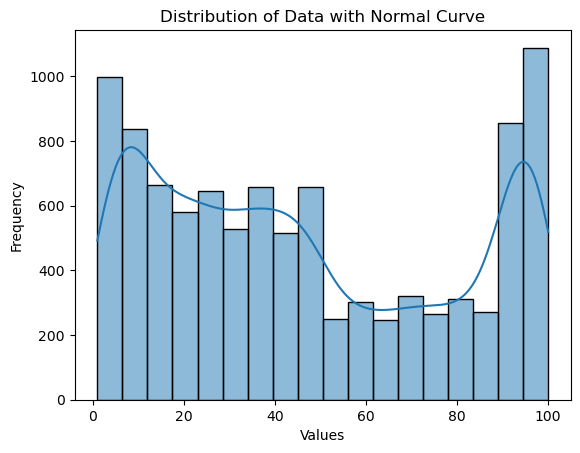

In [7]:
# Create visualization using first column
sns.histplot(data=df.iloc[:, 0], kde=True)
plt.title('Distribution of Data with Normal Curve')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

As expected, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [8]:
# Your code here
# use normaltest to check for normality
stat, p = st.normaltest(df) # it shows the test statistic and p-value
print('Statistics=%.3f, p=%.3f' % (stat, p)) 
# interpret the p-value
alpha = 0.05
if p < alpha:
    print("Sample does not follow a normal distribution (reject H0)")
else:
    print("Sample follows a normal distribution (fail to reject H0)")


Statistics=43432.811, p=0.000
Sample does not follow a normal distribution (reject H0)


C:\Users\DAMA\AppData\Local\Temp\ipykernel_18236\3486984797.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Statistics=%.3f, p=%.3f' % (stat, p))


The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sampling Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`. Additionally, we've added a marker for random seed for reproducability. 

In [9]:
def get_sample(df, n, seed):
    #Adding random seed for reproducibility
    np.random.seed(seed)
    
    #Your code here

    data= df.iloc[:, 0]  # Select the first column
    sample = np.random.choice(data, size=n, replace=True)
    return sample

test_sample = get_sample(df, 30, 0)
print(test_sample[:5]) 
# [56, 12, 73, 24, 8] (This will change if you run it multiple times)

[56 12 73 24  8]


In [10]:
# ...existing code...
def get_sample(data, n, seed):
    # Adding random seed for reproducibility
    np.random.seed(seed)
    # Normalize input to 1D numpy array (handle Series, DataFrame, list, ndarray)
    arr = np.asarray(data)
    if arr.ndim > 1:
        # If a 2D array / DataFrame, take the first column
        arr = arr[:, 0]
    # Sample with replacement
    sample = np.random.choice(arr, size=n, replace=True)
    return sample

# test the function
test_sample = get_sample(df, 30, 0)            # works if df is DataFrame
test_sample2 = get_sample(df.iloc[:, 0], 30, 0) # works if passing a Series
print(test_sample[:5])
# ...existing code...

[56 12 73 24  8]


## Generating a Sample Mean

Next, we'll write another helper function that takes in a sample and returns the mean of that sample.  

In [11]:
# ...existing code...
def get_sample_mean(sample):
    """Return the mean of a sample (handles list, Series, ndarray)."""
    arr = np.asarray(sample)
    return arr.mean()

# test the function
test_sample2 = get_sample(df.iloc[:, 0], 30, 0)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean)
# 32.733333333333334


32.733333333333334


### Creating a Sampling Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sampling distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sampling distribution of sample means of the given size.  

Make sure to include some way to change the seed as your function proceeds!

In [13]:
# ...existing code...
def create_sample_distribution(data, dist_size=100, n=30, start_seed=0):
    """Create a sampling distribution of sample means.
    - data: array-like (Series, DataFrame, ndarray)
    - dist_size: number of sample means to generate
    - n: size of each sample
    - start_seed: integer seed to start from; seed increments by 1 each sample
    """
    means = []
    for i in range(dist_size):
        sample = get_sample(data, n, seed=start_seed + i)
        means.append(get_sample_mean(sample))
    return np.array(means)

# test the function
test_sample_dist = create_sample_distribution(df)
print(test_sample_dist[:5])
# If you set your seed to start at zero and iterate by 1 each sample you should get:
# [32.733333333333334, 54.266666666666666, 50.7, 36.53333333333333, 40.0]

[32.73333333 54.26666667 50.7        36.53333333 40.        ]


In [14]:
def create_sample_distribution(data, dist_size=100, n=30, start_seed=0):
    """Create a sampling distribution of sample means.
    - data: array-like (Series, DataFrame, ndarray)
    - dist_size: number of sample means to generate
    - n: size of each sample
    - start_seed: integer seed to start from; seed increments by 1 each sample
    """
    means = []
    for i in range(dist_size):
        sample = get_sample(data, n, seed=start_seed + i)
        means.append(get_sample_mean(sample))
    return np.array(means)

# test the function
test_sample_dist = create_sample_distribution(df)
print(test_sample_dist[:5]) 

# If you set your seed to start at zero and iterate by 1 each sample you should get:
# [32.733333333333334, 54.266666666666666, 50.7, 36.53333333333333, 40.0]

[32.73333333 54.26666667 50.7        36.53333333 40.        ]


## Visualizing the Sampling Distribution as it Becomes Normal

The sampling distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sampling distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sampling distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sampling distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sampling distribution with `displot`.

[47.         79.66666667 37.66666667 79.66666667 49.66666667 88.66666667
 45.33333333 33.         37.66666667 60.66666667]
Mean of sample means: 55.900, std: 19.092


c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


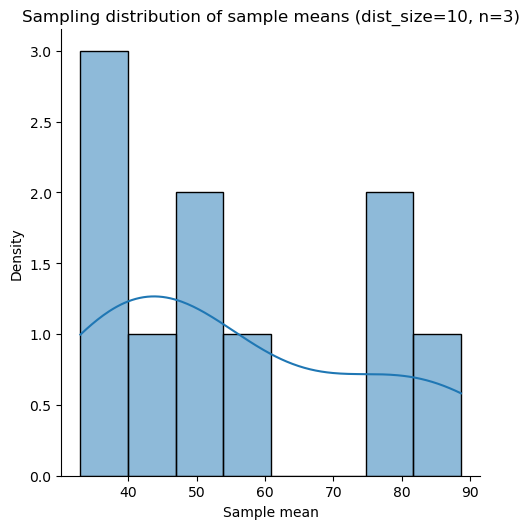

In [15]:
# Your code here
sample_means = create_sample_distribution(df, dist_size=10, n=3, start_seed=0)
print(sample_means)
print(f"Mean of sample means: {sample_means.mean():.3f}, std: {sample_means.std():.3f}")

sns.displot(sample_means, kde=True, bins=8)
plt.title('Sampling distribution of sample means (dist_size=10, n=3)')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.show()


Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.  

[36.9 50.1 61.7 41.  49.7 60.  48.9 30.1 40.8 48.5 35.3 50.3 50.  49.7
 53.9 35.1 42.6 33.4 41.6 59.2 45.9 61.4 46.3 67.8 44.1 42.4 39.2 53.5
 62.9 41.9]
Mean of sample means: 47.473, std: 9.402


c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


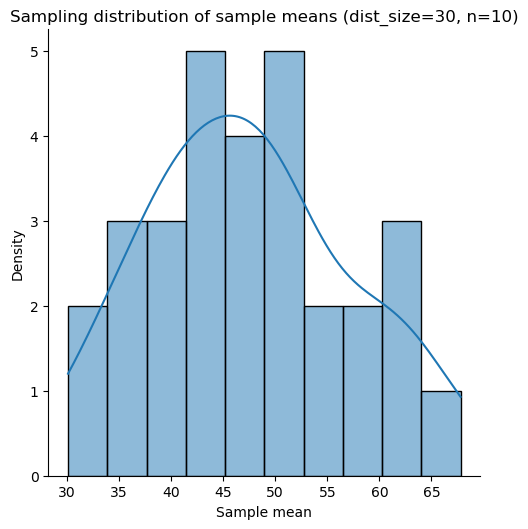

In [16]:
# Your code here
sample_means_30_10 = create_sample_distribution(df, dist_size=30, n=10, start_seed=0)
print(sample_means_30_10)
print(f"Mean of sample means: {sample_means_30_10.mean():.3f}, std: {sample_means_30_10.std():.3f}")

sns.displot(sample_means_30_10, kde=True, bins=10)
plt.title('Sampling distribution of sample means (dist_size=30, n=10)')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.show()


The data is already looking much more 'normal' than the first sampling distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

In the cell below, create another sampling distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

First 10 sample means: [32.73333333 54.26666667 50.7        36.53333333 40.         48.03333333
 50.56666667 39.46666667 41.9        40.13333333]
Mean of sample means: 46.418, std: 5.895


c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


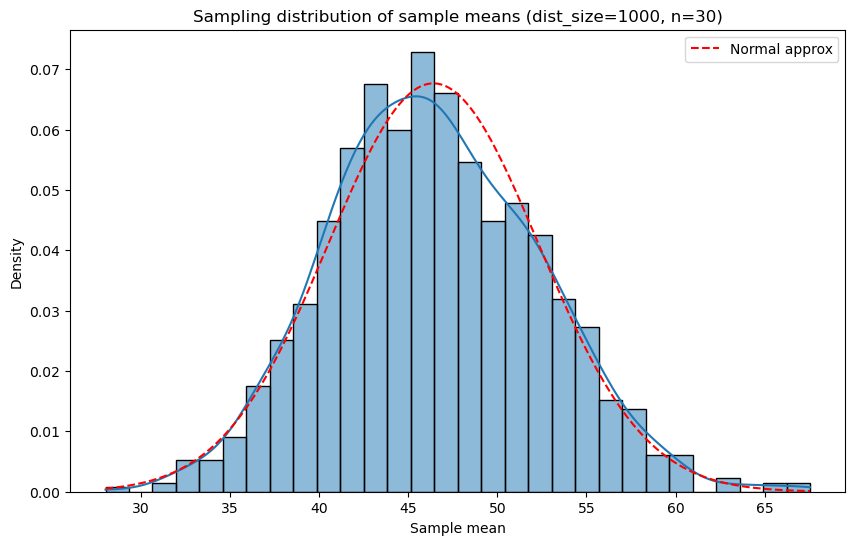

In [18]:
# Your code here
sample_means_1000_30 = create_sample_distribution(df, dist_size=1000, n=30, start_seed=0)
print(f"First 10 sample means: {sample_means_1000_30[:10]}")
print(f"Mean of sample means: {sample_means_1000_30.mean():.3f}, std: {sample_means_1000_30.std():.3f}")

# Visualize sampling distribution
plt.figure(figsize=(10,6))
sns.histplot(sample_means_1000_30, kde=True, stat='density', bins=30)
plt.title('Sampling distribution of sample means (dist_size=1000, n=30)')
plt.xlabel('Sample mean')
plt.ylabel('Density')

# Optional: overlay theoretical normal curve with same mean/std
x = np.linspace(sample_means_1000_30.min(), sample_means_1000_30.max(), 200)
mu, sigma = sample_means_1000_30.mean(), sample_means_1000_30.std()
from scipy.stats import norm
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal approx')
plt.legend()
plt.show()
def create_sample_distribution(data, dist_size=100, n=30, start_seed=0):
    """Create a sampling distribution of sample means.
    - data: array-like (Series, DataFrame, ndarray)
    - dist_size: number of sample means to generate
    - n: size of each sample
    - start_seed: integer seed to start from; seed increments by 1 each sample
    """
    means = []
    for i in range(dist_size):
        sample = get_sample(data, n, seed=start_seed + i)
        means.append(get_sample_mean(sample))
    return np.array(means)

Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sampling distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

In this lab, we learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  